<a href="https://colab.research.google.com/github/drscghosh/Testing/blob/master/Gene_Effect_Estimation_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


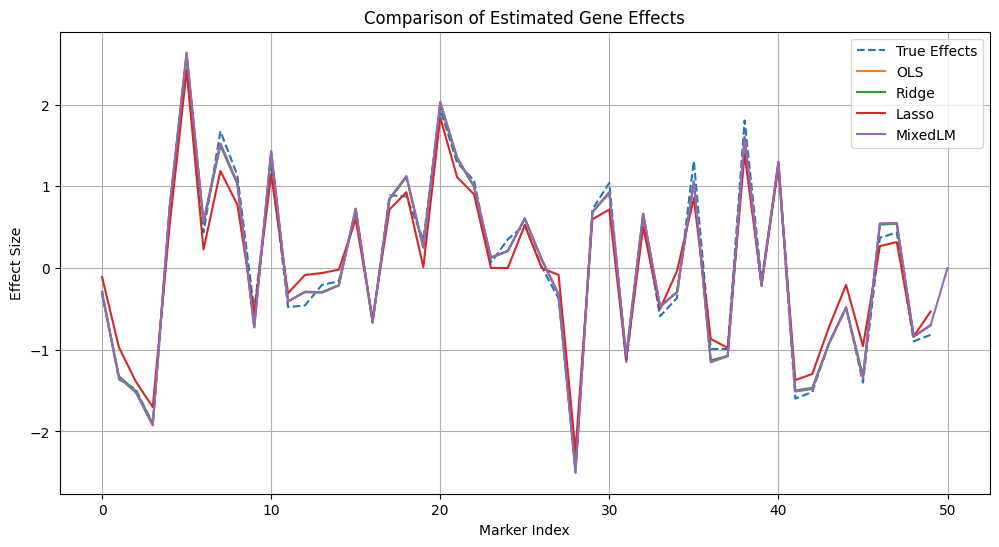

In [7]:
import statsmodels.api as sm

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from statsmodels.regression.mixed_linear_model import MixedLM
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Simulate genetic data
np.random.seed(42)
n_individuals = 200
n_markers = 50

# Simulate genotypes (0, 1, 2)
X = np.random.choice([0, 1, 2], size=(n_individuals, n_markers))

# Simulate marker effects
true_effects = np.random.normal(0, 1, size=n_markers)

# Simulate phenotype: y = Xβ + ε
noise = np.random.normal(0, 1, n_individuals)
y = X @ true_effects + noise

# Create DataFrame
genotypes = pd.DataFrame(X, columns=[f"marker_{i}" for i in range(n_markers)])
phenotypes = pd.Series(y, name='phenotype')

# 1. Linear Model (OLS)
lm = LinearRegression()
lm.fit(genotypes, phenotypes)
ols_effects = lm.coef_

# 2. Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(genotypes, phenotypes)
ridge_effects = ridge.coef_

# 3. Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(genotypes, phenotypes)
lasso_effects = lasso.coef_

# 4. Mixed Linear Model (random intercept by individual group)
data = genotypes.copy()
data["phenotype"] = phenotypes
data["group"] = np.random.choice(['A', 'B'], size=n_individuals)

exog = sm.add_constant(data.drop(columns=["phenotype", "group"]))
endog = data["phenotype"]
groups = data["group"]

mlm = MixedLM(endog, exog, groups=groups)
mlm_fit = mlm.fit()
mlm_effects = mlm_fit.params[1:]  # remove intercept

# Plot the estimated effects
plt.figure(figsize=(12, 6))
plt.plot(true_effects, label='True Effects', linestyle='--')
plt.plot(ols_effects, label='OLS')
plt.plot(ridge_effects, label='Ridge')
plt.plot(lasso_effects, label='Lasso')
plt.plot(mlm_effects.values, label='MixedLM')
plt.legend()
plt.title('Comparison of Estimated Gene Effects')
plt.xlabel('Marker Index')
plt.ylabel('Effect Size')
plt.grid(True)
plt.show()